In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from sklearn.metrics import classification_report

In [5]:
import cv2 as cv

In [6]:
# Kaggle dataset directories
train_data_dir = "D:/MS/Term6/462/Project/Data/train"
test_data_dir = "D:/MS/Term6/462/Project/Data/test"

img_size = 48
categories = ['REAL', 'FAKE']

def load_data(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img))
                resized_array = cv.resize(img_array, (img_size, img_size))
                resized_array = resized_array / 255.0
                data.append([resized_array, class_num])
            except Exception as e:
                pass
    return data

In [16]:
training_data = load_data(train_data_dir, categories, img_size)


In [7]:
testing_data = load_data(test_data_dir, categories, img_size)

In [17]:
# Load and preprocess the data
random.shuffle(training_data)
random.shuffle(testing_data)

X_train = []
y_train = []
X_test = []
y_test = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [46]:
# Creating the model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\mshrv\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,089 (1.56 MB)

 Trainable params: 409,089 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 101s 31ms/step - accuracy: 0.7527 - loss: 0.4874 - val_accuracy: 0.8684 - val_loss: 0.3176
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 99s 32ms/step - accuracy: 0.8828 - loss: 0.2835 - val_accuracy: 0.8986 - val_loss: 0.2463
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 101s 32ms/step - accuracy: 0.9019 - loss: 0.2392 - val_accuracy: 0.9097 - val_loss: 0.2234
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 99s 32ms/step - accuracy: 0.9079 - loss: 0.2262 - val_accuracy: 0.9021 - val_loss: 0.2515
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 94s 30ms/step - accuracy: 0.9175 - loss: 0.2065 - val_accuracy: 0.9227 - val_loss: 0.1979
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - accuracy: 0.9226 - loss: 0.1926 - val_accuracy: 0.9203 - val_loss: 0.1957
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 96s 31ms/step - accuracy: 0.9247 - loss: 0.1850 - val_accuracy: 0.9330 - val_loss: 0.1761
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - accuracy: 0.9276

In [49]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Predictions
y_pred = model.predict(X_test)
y_predicted = (y_pred > 0.5).astype("int32").flatten()

# Classification report
print(classification_report(y_test, y_predicted))

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9418 - loss: 0.1434
Test accuracy: 0.9456499814987183
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10000
           1       0.96      0.93      0.94     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



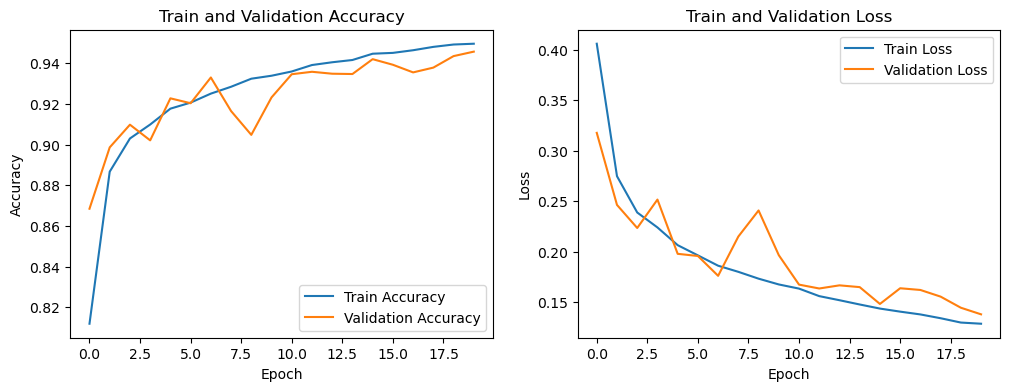

In [50]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.show()

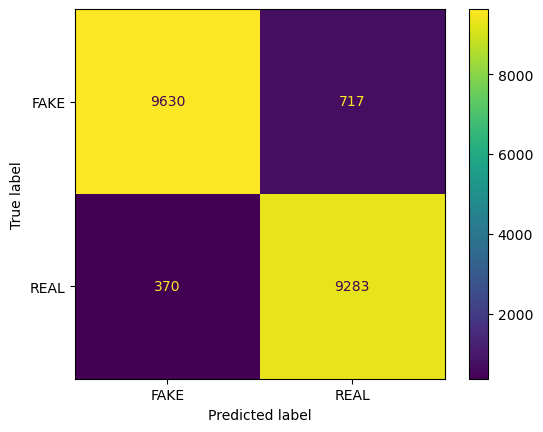

In [51]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_predicted, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['FAKE', 'REAL'])
cm_display.plot()
plt.show()

In [52]:

model.save("AIGeneratedModel.h5")
model.save("REAL_FAKE_CNN_Model.keras")

In [35]:
import shutil
shutil.move("AIGeneratedModel.h5", "D:/MS/Term6/462/Project/Models")
shutil.move("REAL_FAKE_CNN_Model.keras", "D:/MS/Term6/462/Project/Models")

'D:/MS/Term6/462/Project/Models\\REAL_FAKE_CNN_Model.keras'

In [3]:
model_new = tf.keras.models.load_model("REAL_FAKE_CNN_Model.keras")
print("Model loaded successfully")

Model loaded successfully


C:\Users\mshrv\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
